Importing:

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [3]:
%run "src/dataloading.ipynb"
%run "training.ipynb"
%run "evaluate.ipynb"
%run "visualizations.ipynb"
%run "model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [4]:
def update_current_model(json_file, new_model_name):
    # Load the JSON data from the file
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Update the current-model value
    data['current-model'] = new_model_name

    # Save the updated JSON data back to the file
    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)
json_file_path = 'configs/model_configs.json'
new_model_name = 'AlexNet'
update_current_model(json_file_path, new_model_name)

In [5]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'AlexNet':
        model = MRI_AlexNet
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])


In [6]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:08<02:43,  8.63s/epoch]

Epoch [1/20] Train Loss: 1.3543 Train Accuracy: 30.59% Validation Loss: 1.3603 Validation Accuracy: 28.43%


Training:  10%|█         | 2/20 [00:16<02:25,  8.06s/epoch]

Epoch [2/20] Train Loss: 1.2817 Train Accuracy: 37.48% Validation Loss: 1.2101 Validation Accuracy: 42.49%


Training:  15%|█▌        | 3/20 [00:23<02:13,  7.85s/epoch]

Epoch [3/20] Train Loss: 1.1796 Train Accuracy: 42.81% Validation Loss: 1.3120 Validation Accuracy: 39.42%


Training:  20%|██        | 4/20 [00:31<02:04,  7.78s/epoch]

Epoch [4/20] Train Loss: 1.1053 Train Accuracy: 48.68% Validation Loss: 1.2010 Validation Accuracy: 44.75%


Training:  25%|██▌       | 5/20 [00:39<01:55,  7.72s/epoch]

Epoch [5/20] Train Loss: 1.0130 Train Accuracy: 54.71% Validation Loss: 1.1205 Validation Accuracy: 47.98%


Training:  30%|███       | 6/20 [00:46<01:47,  7.67s/epoch]

Epoch [6/20] Train Loss: 0.9453 Train Accuracy: 59.72% Validation Loss: 0.9786 Validation Accuracy: 57.03%


Training:  35%|███▌      | 7/20 [00:54<01:39,  7.64s/epoch]

Epoch [7/20] Train Loss: 0.8110 Train Accuracy: 67.53% Validation Loss: 0.8329 Validation Accuracy: 65.75%


Training:  40%|████      | 8/20 [01:01<01:31,  7.62s/epoch]

Epoch [8/20] Train Loss: 0.7087 Train Accuracy: 72.37% Validation Loss: 0.7322 Validation Accuracy: 70.11%


Training:  45%|████▌     | 9/20 [01:09<01:23,  7.61s/epoch]

Epoch [9/20] Train Loss: 0.7304 Train Accuracy: 71.51% Validation Loss: 0.6631 Validation Accuracy: 73.67%


Training:  50%|█████     | 10/20 [01:17<01:15,  7.60s/epoch]

Epoch [10/20] Train Loss: 0.6471 Train Accuracy: 76.20% Validation Loss: 0.7109 Validation Accuracy: 71.24%


Training:  55%|█████▌    | 11/20 [01:24<01:08,  7.60s/epoch]

Epoch [11/20] Train Loss: 0.5673 Train Accuracy: 78.41% Validation Loss: 0.5963 Validation Accuracy: 76.58%


Training:  60%|██████    | 12/20 [01:32<01:00,  7.60s/epoch]

Epoch [12/20] Train Loss: 0.4333 Train Accuracy: 83.63% Validation Loss: 0.7022 Validation Accuracy: 74.80%


Training:  65%|██████▌   | 13/20 [01:39<00:53,  7.60s/epoch]

Epoch [13/20] Train Loss: 0.4209 Train Accuracy: 83.09% Validation Loss: 0.5115 Validation Accuracy: 81.42%


Training:  70%|███████   | 14/20 [01:47<00:45,  7.54s/epoch]

Epoch [14/20] Train Loss: 0.3398 Train Accuracy: 86.27% Validation Loss: 0.5079 Validation Accuracy: 83.04%


Training:  75%|███████▌  | 15/20 [01:54<00:37,  7.53s/epoch]

Epoch [15/20] Train Loss: 0.2631 Train Accuracy: 90.20% Validation Loss: 0.5528 Validation Accuracy: 80.45%


Training:  80%|████████  | 16/20 [02:02<00:29,  7.49s/epoch]

Epoch [16/20] Train Loss: 0.2435 Train Accuracy: 90.41% Validation Loss: 0.4387 Validation Accuracy: 84.65%


Training:  85%|████████▌ | 17/20 [02:09<00:22,  7.52s/epoch]

Epoch [17/20] Train Loss: 0.1729 Train Accuracy: 93.48% Validation Loss: 0.4704 Validation Accuracy: 84.49%


Training:  90%|█████████ | 18/20 [02:16<00:14,  7.41s/epoch]

Epoch [18/20] Train Loss: 0.1713 Train Accuracy: 93.32% Validation Loss: 0.5089 Validation Accuracy: 83.84%


Training:  95%|█████████▌| 19/20 [02:24<00:07,  7.44s/epoch]

Epoch [19/20] Train Loss: 0.1611 Train Accuracy: 95.05% Validation Loss: 0.4487 Validation Accuracy: 87.08%


Training: 100%|██████████| 20/20 [02:31<00:00,  7.60s/epoch]

Epoch [20/20] Train Loss: 0.1701 Train Accuracy: 93.43% Validation Loss: 0.3949 Validation Accuracy: 87.08%


In [7]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:00<00:17,  1.09epoch/s]

Testing Epoch [1/20] Test Loss: 0.3075 Test Accuracy: 89.35% Time per Epoch: 0.92 seconds


Testing:  10%|█         | 2/20 [00:01<00:16,  1.12epoch/s]

Testing Epoch [2/20] Test Loss: 0.3000 Test Accuracy: 89.35% Time per Epoch: 0.87 seconds


Testing:  15%|█▌        | 3/20 [00:02<00:15,  1.12epoch/s]

Testing Epoch [3/20] Test Loss: 0.3009 Test Accuracy: 89.35% Time per Epoch: 0.89 seconds


Testing:  20%|██        | 4/20 [00:03<00:14,  1.11epoch/s]

Testing Epoch [4/20] Test Loss: 0.3090 Test Accuracy: 89.35% Time per Epoch: 0.90 seconds


Testing:  25%|██▌       | 5/20 [00:04<00:13,  1.12epoch/s]

Testing Epoch [5/20] Test Loss: 0.3054 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  30%|███       | 6/20 [00:05<00:12,  1.14epoch/s]

Testing Epoch [6/20] Test Loss: 0.2975 Test Accuracy: 89.35% Time per Epoch: 0.86 seconds


Testing:  35%|███▌      | 7/20 [00:06<00:11,  1.14epoch/s]

Testing Epoch [7/20] Test Loss: 0.2970 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  40%|████      | 8/20 [00:07<00:10,  1.14epoch/s]

Testing Epoch [8/20] Test Loss: 0.3142 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  45%|████▌     | 9/20 [00:07<00:09,  1.13epoch/s]

Testing Epoch [9/20] Test Loss: 0.3010 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  50%|█████     | 10/20 [00:08<00:08,  1.13epoch/s]

Testing Epoch [10/20] Test Loss: 0.3078 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  55%|█████▌    | 11/20 [00:09<00:07,  1.14epoch/s]

Testing Epoch [11/20] Test Loss: 0.3003 Test Accuracy: 89.35% Time per Epoch: 0.86 seconds


Testing:  60%|██████    | 12/20 [00:10<00:07,  1.14epoch/s]

Testing Epoch [12/20] Test Loss: 0.3059 Test Accuracy: 89.35% Time per Epoch: 0.87 seconds


Testing:  65%|██████▌   | 13/20 [00:11<00:06,  1.13epoch/s]

Testing Epoch [13/20] Test Loss: 0.3081 Test Accuracy: 89.35% Time per Epoch: 0.90 seconds


Testing:  70%|███████   | 14/20 [00:12<00:05,  1.14epoch/s]

Testing Epoch [14/20] Test Loss: 0.3061 Test Accuracy: 89.35% Time per Epoch: 0.86 seconds


Testing:  75%|███████▌  | 15/20 [00:13<00:04,  1.15epoch/s]

Testing Epoch [15/20] Test Loss: 0.3012 Test Accuracy: 89.35% Time per Epoch: 0.86 seconds


Testing:  80%|████████  | 16/20 [00:14<00:03,  1.14epoch/s]

Testing Epoch [16/20] Test Loss: 0.2983 Test Accuracy: 89.35% Time per Epoch: 0.87 seconds


Testing:  85%|████████▌ | 17/20 [00:14<00:02,  1.14epoch/s]

Testing Epoch [17/20] Test Loss: 0.2982 Test Accuracy: 89.35% Time per Epoch: 0.87 seconds


Testing:  90%|█████████ | 18/20 [00:15<00:01,  1.14epoch/s]

Testing Epoch [18/20] Test Loss: 0.3015 Test Accuracy: 89.35% Time per Epoch: 0.88 seconds


Testing:  95%|█████████▌| 19/20 [00:16<00:00,  1.13epoch/s]

Testing Epoch [19/20] Test Loss: 0.3090 Test Accuracy: 89.35% Time per Epoch: 0.90 seconds


Testing: 100%|██████████| 20/20 [00:17<00:00,  1.13epoch/s]

Testing Epoch [20/20] Test Loss: 0.2963 Test Accuracy: 89.35% Time per Epoch: 0.87 seconds
Average Test Loss: 0.3033
Average Test Accuracy: 89.35%


Training Classification:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       186
           1       0.87      0.83      0.85       178
           2       0.82      0.98      0.89        87
           3       0.96      0.95      0.96       169

    accuracy                           0.89       620
   macro avg       0.89      0.91      0.89       620
weighted avg       0.90      0.89      0.89       620



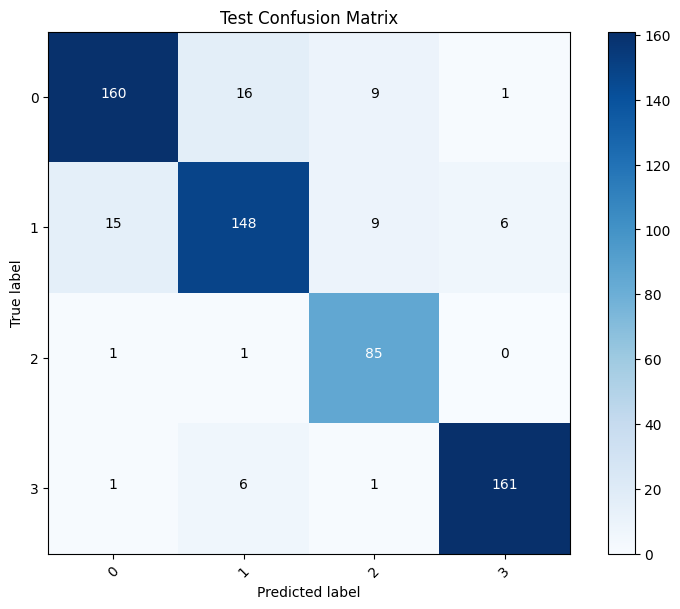

In [8]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

# print(classification_report(train_labels, train_preds))
# print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)] 
# plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
# plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curve:

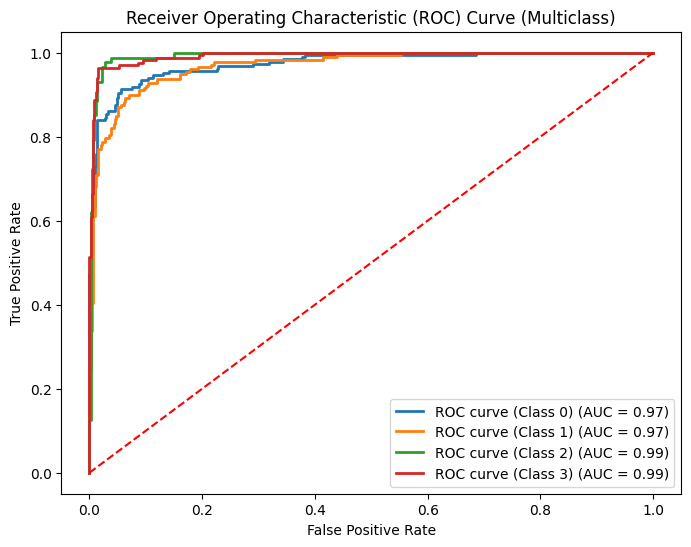

In [9]:
plot_auc_curve_multiclass(model,test_loader,4)